# **Convolutions**

In this notebook, we will explore the concept of **convolutions**, a fundamental operation in many deep learning architectures, particularly in the context of image and signal processing tasks. Convolutions ***allow neural networks to efficiently capture spatial hierarchies and patterns in data***, making them key for things like image recognition, object detection, and even time-series analysis.

The core idea behind convolutions is that they apply a small **filter** (or **kernel**) across the input data in a sliding window fashion, computing weighted sums. This operation enables the model to learn local patterns (such as edges or textures in images) while also reducing the dimensionality of the data. Convolutions allow for parameter sharing, meaning the same set of weights is applied across different regions of the input, leading to fewer parameters and more efficient computation.

In this notebook, we'll be using the `torch.nn` module to implement differnt kinds of convolutions and examine their effects.

## 1. Understanding Image Composition

When working with images in machine learning, it's important to understand that images are essentially just matrices of pixel values. Each pixel represents a tiny square in the image, and the value of each pixel corresponds to its color or intensity.

For grayscale images, each pixel value is a single number, typically ranging from 0 to 255, with higher numbers signifying more intensity. The number 0 represents black, while 255 represents white, and the values in between represent varying shades of gray. If you're ever mixing up which color is at 0 and which is at 255, think about it in terms of the intensity of light. Without light, there is darkness (0) and with light there is brightness (255).

# 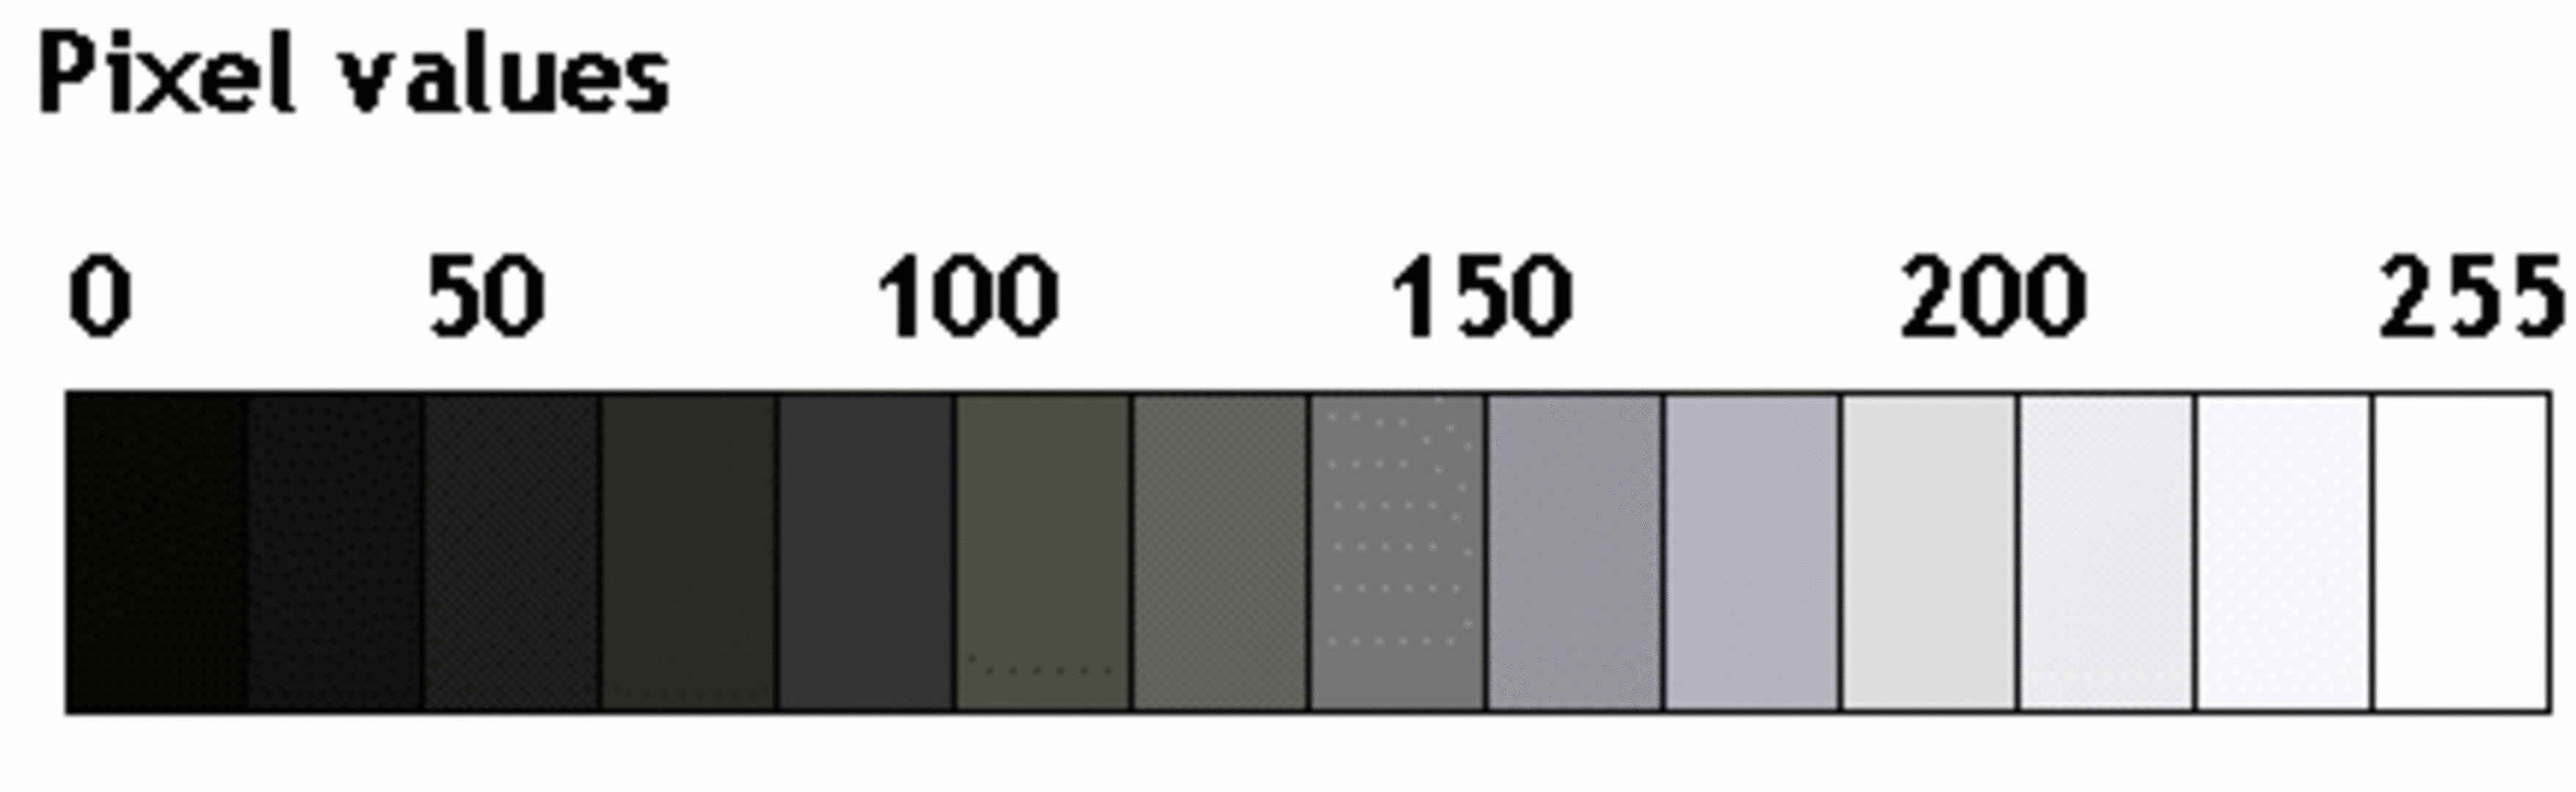

*Image from the European Space Agency*

For color images, things get a bit more complex. Instead of a single value per pixel, color images usually have three values per pixel, each representing one of the primary colors in the RGB (Red, Green, Blue) color model. Each of the red, green, and blue channels can have values ranging from 0 to 255, where 0 means no intensity and 255 means full intensity for that color. By combining different intensities of these three colors, you can create a wide range of colors that make up the image.

In practice, this means that a color image with dimensions of 100x100 pixels would have a matrix of size 100x100 for each of the three color channels, making a total of three matrices (one for each color channel).

## 2. Set up



In [ ]:
# import required libraries
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# mount google drive so we can read in an image
from google.colab import drive
drive.mount('/content/drive')

# helper function to visualize feature maps
def visualize_feature_maps(feature_maps, title, cmap='viridis'):
    num_maps = feature_maps.shape[0]
    cols = 4
    rows = (num_maps + cols - 1) // cols
    plt.figure(figsize=(15, 4 * rows))
    for i in range(num_maps):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(feature_maps[i].detach().cpu().numpy(), cmap=cmap)
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

In [ ]:
# Load and preprocess an example image
# Replace 'XXXX.jpg' with a local image file path
#image_path = "/content/drive/My Drive/XXXX.jpg"
image_path = "/content/drive/My Drive/colab/images/lion.jpg"
image = Image.open(image_path).convert("RGB")

# Preprocessing: Resize and convert to tensor for convolutions
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])
input_image = transform(image).unsqueeze(0)

# Show image
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.axis('off')
plt.title("Original Image")
plt.show()

## 3. Types of Convolutions

### **Conv2D**
`Conv2D` is the standard 2D convolution layer in PyTorch, used for processing image data. It applies a set of learnable filters across the input image to extract features such as edges, textures, or patterns. Here's how it works:
- Each filter has separate kernels for each input channel (e.g., RGB channels).
- The kernels slide across the input image, performing element-wise multiplications and summing the results.
- The results from all channels are summed to produce a single feature map per filter.

**Pros**:
- Captures spatial patterns across all channels.
- Highly versatile and forms the backbone of most CNN architectures.

**Cons**:
- Computationally expensive for large images and deep networks.

### **Depthwise Convolution**
Depthwise convolution processes each channel of the input image independently. Each channel has its own filter, and no cross-channel interaction occurs during this convolution.

**Pros**:
- Computationally efficient and lightweight.
- Reduces the number of parameters compared to Conv2D.

**Cons**:
- Cannot capture cross-channel relationships, which can limit its ability to model complex interactions.

### **Dilated Convolution**
Dilated convolution skips certain input values while applying the kernel, controlled by the dilation rate. This increases the receptive field of the kernel without increasing its size.

**Pros**:
- Captures features over larger spatial regions.
- Useful for tasks like semantic segmentation where larger contexts are important.

**Cons**:
- May miss finer details due to the skipped pixels.

### **Transposed Convolution**
Transposed convolution (also called deconvolution) is used to upsample feature maps. It reverses the spatial downsampling performed by Conv2D, effectively increasing the spatial dimensions of the output.

**Pros**:
- Essential for generating high-resolution outputs in tasks like image generation or segmentation.

**Cons**:
- Prone to checkerboard artifacts if not carefully designed.

### **Pointwise Convolution**
Pointwise convolution uses a 1x1 kernel, effectively combining information across all input channels without considering spatial relationships.

**Pros**:
- Efficiently combines cross-channel information.
- Used in architectures like MobileNet to reduce computational costs.

**Cons**:
- Does not process spatial patterns directly.

## 4. Create convolutional layers and apply them

In [ ]:
# Define convolution layers
conv2d = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=1)
depthwise_conv = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1, groups=3)
dilated_conv = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=2, dilation=2)
transposed_conv = nn.ConvTranspose2d(in_channels=3, out_channels=6, kernel_size=3, stride=2, padding=1, output_padding=1)
pointwise_conv = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=1)

# Apply convolutions to the image
conv2d_output = conv2d(input_image)
depthwise_output = depthwise_conv(input_image)
dilated_output = dilated_conv(input_image)
transposed_output = transposed_conv(input_image)
pointwise_output = pointwise_conv(input_image)

## 5. Visualize the impacts of each convolution type

In [ ]:
# Original image
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.axis('off')
plt.title("Original Image")
plt.show()

# Conv2d
visualize_feature_maps(conv2d_output[0], title="Conv2D Feature Maps")

# Depthwise Conv
visualize_feature_maps(depthwise_output[0], title="Depthwise Conv Feature Maps")

# Dilated Conv
visualize_feature_maps(dilated_output[0], title="Dilated Conv Feature Maps")

# Transposed Conv
visualize_feature_maps(transposed_output[0], title="Transposed Conv Feature Maps")

# Pointwise Conv
visualize_feature_maps(pointwise_output[0], title="Pointwise Conv Feature Maps")

## 6. Explore impacts of padding, stride, and kernel size

**Padding**:
- Padding adds borders of zeros around the input image to control the spatial size of the output feature map.
- Example: `padding=1` ensures the output has the same spatial dimensions as the input for a kernel size of 3x3.

**Stride**:
- Stride controls how far the filter moves after each operation.
- Example: `stride=3` skips every two pixels, reducing the spatial dimensions of the output.

**Kernel Size**:
- Kernel size determines the dimensions of the filter.
- Example: A larger kernel (e.g., 7x7) captures broader patterns but is computationally heavier.

In [ ]:
### Alter padding, kernel size, and stride ###

# Manipulate padding on Conv2D
conv_no_padding = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=0)
conv_large_padding = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=10)

# Manipulate stride on Conv2D
conv_small_stride = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=0)
conv_large_stride = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=3, padding=0)

# Manipulate kernel size on Conv2D
conv_small_kernel = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=0)
conv_large_kernel = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=7, stride=1, padding=0)

# Apply each variation
output_no_padding = conv_no_padding(input_image)
output_large_padding = conv_large_padding(input_image)
output_small_stride = conv_small_stride(input_image)
output_large_stride = conv_large_stride(input_image)
output_small_kernel = conv_small_kernel(input_image)
output_large_kernel = conv_large_kernel(input_image)

### Visualize results ##
# Padding size
visualize_feature_maps(output_no_padding[0], title="Conv2D with No Padding")
visualize_feature_maps(output_large_padding[0], title="Conv2D with Padding of 10")

# Stride
visualize_feature_maps(output_small_stride[0], title="Conv2D with Stride=1")
visualize_feature_maps(output_large_stride[0], title="Conv2D with Stride=3")

# Kernel size
visualize_feature_maps(output_small_kernel[0], title="Conv2D with Small Kernel (3x3)")
visualize_feature_maps(output_large_kernel[0], title="Conv2D with Large Kernel (7x7)")